# Constrained optimization

Constrained optimization is a type of method, or technique, that seeks to minimize or maximize some function, subject to constraints that curb freedom of movement. One such method might minimize costs or minimize the depletion of resources; another might maximize profit margins. Constraints are effectively boundaries that can’t be breached while crunching numbers to maximize or minimize some defined function.

We'll use constrained opitimization to evaluatate several players in the free agent market.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as matplot
import matplotlib.pyplot as plt
import patchworklib as pw
import math
import scipy.optimize as opt

<Figure size 100x100 with 0 Axes>

In [2]:
%matplotlib inline
sns.set_theme(style='darkgrid')

In [3]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [4]:
pd.options.display.float_format = '{:.0f}'.format

In [5]:
df = pd.read_csv("../statisticsplaybook-main/free_agents.csv", encoding= 'unicode_escape')

In [6]:
df.head()

,player,current_team,age,position1,position2,annual_salary,win_shares
0,Chris Paul,PHX,37,PG,PG1,32000000,7
1,Kawhi Leonard,LAC,31,SF,SF1,37000000,9
2,Blake Griffin,DET,33,PF,PF1,35000000,5
3,Josh Richardson,DAL,29,SG,SG1,11000000,3
4,Gary Harris,DEN,28,SG,SG2,22500000,4


In [7]:
df.shape

(24, 7)

In [8]:
df.transpose()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23
player,Chris Paul,Kawhi Leonard,Blake Griffin,Josh Richardson,Gary Harris,Montrezl Harrell,Zach LaVine,Rajon Rondo,Ricky Rubio,Rodney Hood,Jonas Valanciunas,Thaddeus Young,Patrick Beverley,Will Barton,Justise Winslow,Marcus Smart,Marvin Bagley III,Taurean Prince,Cory Joseph,Jusuf Nurkic,T.J. Warren,Robert Covington,Serge Ibaka,Aron Baynes
current_team,PHX,LAC,DET,DAL,DEN,LAL,CHI,ATL,MIN,POR,MEM,CHI,LAC,DEN,MEM,BOS,SAC,CLE,SAC,POR,IND,POR,LAC,TOR
age,37,31,33,29,28,28,27,36,31,29,30,34,34,31,26,28,23,28,31,28,29,31,33,35
position1,PG,SF,PF,SG,SG,PF,SG,PG,PG,SF,C,PF,PG,SF,SF,PG,PF,PF,PG,C,SF,PF,C,C
position2,PG1,SF1,PF1,SG1,SG2,PF2,SG3,PG2,PG3,SF2,C1,PF3,PG4,SF3,SF4,PG5,PF4,PF5,PG6,C2,SF5,PF6,C3,C4
annual_salary,32000000,37000000,35000000,11000000,22500000,26000000,10500000,6500000,18500000,19500000,15000000,17000000,16500000,14500000,15000000,15500000,14500000,14500000,14500000,14000000,13500000,13500000,12000000,7000000
win_shares,7,9,5,3,4,4,4,2,5,2,5,4,4,4,3,5,5,2,4,4,4,3,3,2


In [9]:
df.dtypes

player            object
current_team      object
age                int64
position1         object
position2         object
annual_salary      int64
win_shares       float64
dtype: object

In [10]:
df.position1.unique()

array(['PG', 'SF', 'PF', 'SG', 'C'], dtype=object)

In [11]:
df.position2.unique()

array(['PG1', 'SF1', 'PF1', 'SG1', 'SG2', 'PF2', 'SG3', 'PG2', 'PG3',
       'SF2', 'C1', 'PF3', 'PG4', 'SF3', 'SF4', 'PG5', 'PF4', 'PF5',
       'PG6', 'C2', 'SF5', 'PF6', 'C3', 'C4'], dtype=object)

In [12]:
df.describe()

,age,annual_salary,win_shares
count,24,24,24
mean,30,17312500,4
std,3,7936997,2
min,23,6500000,2
25%,28,13500000,3
50%,30,14750000,4
75%,33,18750000,5
max,37,37000000,9


## Density Plot 

Density plot around the continuous variables Salary (annual_salary), Win Shares (win_shares) and Age (age). 

A density plot is essentially a smoothed version of a histogram; like histograms, density plots display the distribution of continuous, or numeric, data

The one advantage density plots have over histograms is that they more accurately reflect the distribution shape because there is no option to fiddle with bin counts. The **disadvantage** of density plots is that the **y-axis is less intuitive** than it is for histograms. It represents a probability rather than a frequency

In [13]:
df['annual_salary']

0     32000000
1     37000000
2     35000000
3     11000000
4     22500000
5     26000000
6     10500000
7      6500000
8     18500000
9     19500000
10    15000000
11    17000000
12    16500000
13    14500000
14    15000000
15    15500000
16    14500000
17    14500000
18    14500000
19    14000000
20    13500000
21    13500000
22    12000000
23     7000000
Name: annual_salary, dtype: int64

In [14]:
pw.clear()
# #Set fig size

ax1 = pw.Brick("ax1", figsize=(10,5))
#plot 1
_ = sns.kdeplot(df['annual_salary'], color='salmon', alpha=.3, bw=.25, ax=ax1)

ax2 = pw.Brick("ax2", figsize=(10,5))
#plot 2
_ = sns.kdeplot(df['win_shares'], color='salmon',  alpha=.3, bw=.3, ax=ax2)

# Plot 1 settings
kdeline = ax1.lines[0]
mean = df['annual_salary'].mean()
# ax1 ticks
ax1.ticklabel_format(style='plain', useMathText=True)
ax1.get_xaxis().set_major_formatter(matplot.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
ax1.set_xlim((5000000, 35000000))
ax1.set_xticks((10000000, 20000000, 30000000))
# ax1 title
ax1.set_title('Annual Salary Distribution')
# ax1 mean/median (percentile shading), text
xs, ys = kdeline.get_xdata(), kdeline.get_ydata()
left, middle, right = np.percentile(df['annual_salary'], [25, 50, 75])
ax1.vlines(middle, 0, np.interp(middle, xs, ys), color='blue', ls='--')
ax1.vlines(mean, 0, np.interp(mean, xs, ys), color='crimson', ls=':')
ax1.fill_between(xs, 0, ys, facecolor='salmon', alpha=0.3, ls='-')
ax1.fill_between(xs, 0, ys, where=(left <= xs) & (xs <= right), interpolate=True, facecolor='blue', alpha=0.1, )
# ax1 text 
ax1.text(middle-650000, .00000003, "Median", rotation=90, color="blue", size=15)
ax1.text(left-650000, .00000001, "25%", rotation=90)
ax1.text(right, .00000001, "75%", rotation=90)
ax1.text(mean+150000, .00000003, "Mean", rotation=90, color='crimson', size=15)


# Plot 2 settings 
# Ticks 
ax2.set_xticks((2.5, 5.0, 7.5))
ax2.set_xlim((1.5, 9))
ax2.set_yticks((0.0, 0.1, 0.2, 0.3))
# ax2 title 
ax2.set_title('Projected Annual Win Shares Distribution')
# ax2 mean(std)/median, text
kdeline = ax2.lines[0]
mean = df['win_shares'].mean()
middle = df['win_shares'].median()
xs, ys = kdeline.get_xdata(), kdeline.get_ydata()
sdev = df['win_shares'].std()
left = middle - sdev
right = middle + sdev
# Create the lines on the kde
median_line = ax2.vlines(middle, 0, np.interp(middle, xs, ys))
mean_line =  ax2.vlines(mean, 0, np.interp(mean, xs, ys), color='crimson', ls=':') 
one_pos_sigma = ax2.vlines(right, 0,  np.interp(right, xs, ys), color='purple' )
one_neg_sigma = ax2.vlines(left, 0,  np.interp(left, xs, ys), color='purple', ls="--" )
# Fill between STD
ax2.fill_between(xs, 0, ys, facecolor='salmon', alpha=0.3, ls='-')
ax2.fill_between(xs, 0, ys, where=(left <= xs) & (xs <= right), interpolate=True, facecolor='blue', alpha=0.1, )
# ax2 text 
ax2.text(middle-.2, .1, "Median", rotation=90, color='blue', size=15)
ax2.text(mean+.1, .1, "Mean", rotation=90, color='crimson', size=15)
# Get lines and labels for legend and chose which ones to display
lines, labels = ax2.get_legend_handles_labels()
_ = ax2.legend([line for i,line in enumerate(lines) if i in display]+[median_line,mean_line, one_pos_sigma, one_neg_sigma],
          [label for i,label in enumerate(labels) if i in display]+['Median', 'Mean', '+1 std', '-1 std'])

In [15]:
ax = pw.Brick("ax3", figsize=(10,5))
# Plot Kde without fill so we can use the lines to find xs/ys
sns.kdeplot(df['age'], color='salmon', alpha=.3, bw=.5, ax=ax)
#configure ticks 
ax.set_xticks((26, 30, 34))
ax.set_xlim((24, 38))
ax.set_yticks((0.0, 0.03, 0.06, 0.09))
# Get xs,ys to prevent line protruding
xs, ys = ax.lines[0].get_xdata(), ax.lines[0].get_ydata()
# get median and mean
median, mean = df['age'].median(), df['age'].mean()
# draw the lines
median_line = ax.vlines(median, 0, np.interp(median, xs, ys))
mean_line =  ax.vlines(mean, 0, np.interp(median, xs, ys), color='crimson', ls=':')
# Fill kde
ax.fill_between(xs, 0, ys, facecolor='salmon', alpha=0.3, ls='-')
# label lines
ax.text(median+.1, .06, "Median", rotation=90, color='blue', size=15)
ax.text(mean-.2, .06, "Mean", rotation=90, color='crimson', size=15)
_ = ax.set_title('Age Distribution')

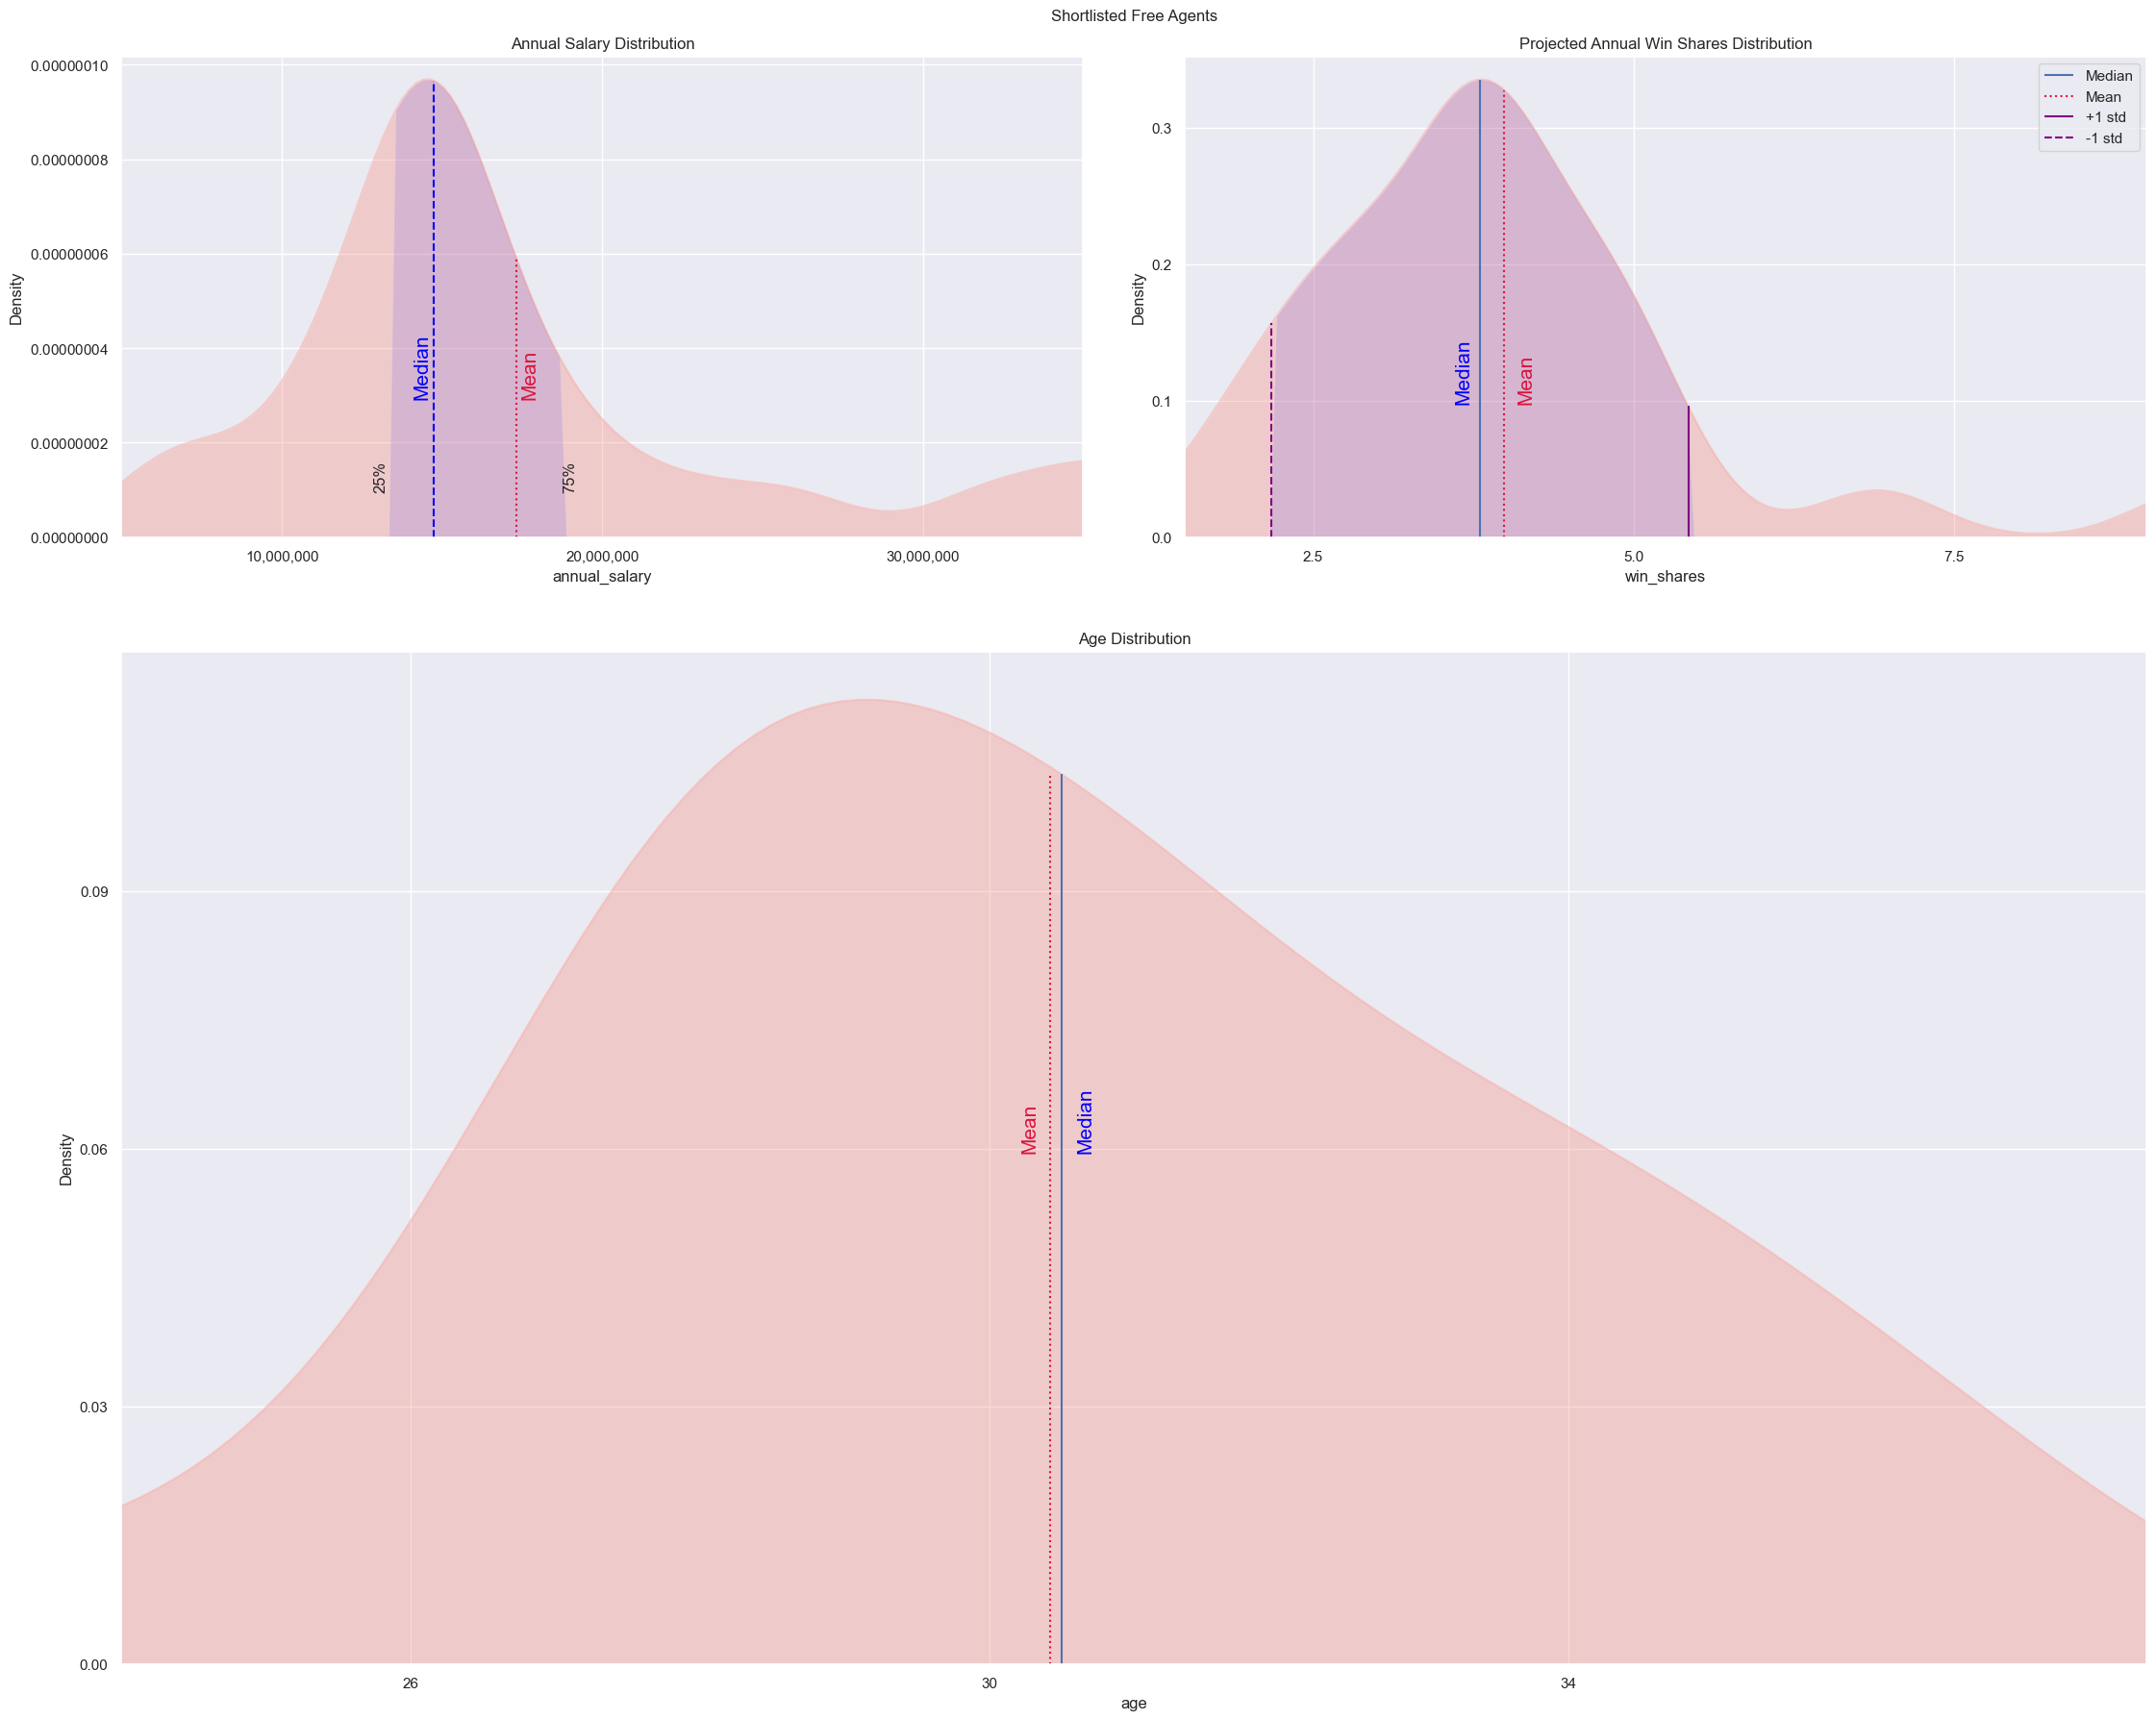

In [16]:
ax12 = (ax1+ax2-ax)
ax12.set_suptitle("Shortlisted Free Agents")
ax12.savefig("ax12.png")

### Visualization Summary

- Annual salaries–these figures representing the year-over-year base salary expectations of our 24 free agents–are right-skewed, or positively-skewed. 

- There are two ways of deducting this–one, most values are obviously clustered around the left tail of the distribution while the right tail is longer, and two, the mean is therefore greater than the median.

- The same can be said for annual win shares–these figures representing the estimated number of accrued win shares per player per season. Given the means and medians of annual_salaries and win_shares, we can reasonably conclude that approximately $15M in salary is the equivalent of about 3.5 to 4 wins.

- The variable age, unlike the variables annual_salaries and win_shares, is normally distributed; both the mean and the median equal about 30.5.

### Positional level distribution 

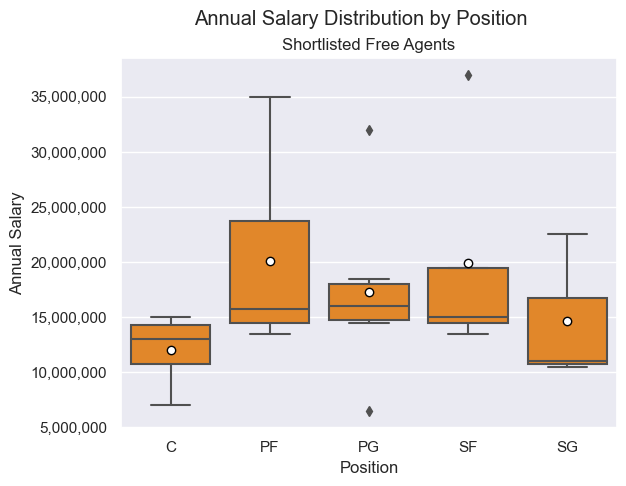

In [17]:
# Works for catplot
# for ax in g.axes.flatten():
    # ax.get_yaxis().set_major_formatter(matplot.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
meanpointprops = dict(marker='o', markeredgecolor='black',
                      markerfacecolor='white')
ax = sns.boxplot(x='position1', 
                 y='annual_salary', 
                 color='#FF870C',
                 showmeans=True,
                 order=['C', 'PF', 'PG', 'SF', 'SG'],
                 meanprops=meanpointprops,
                 data=df)

ax.ticklabel_format(style='plain', useMathText=True, scilimits=(0,0), axis='y')
ax.get_yaxis().set_major_formatter(matplot.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
ax.set_ylabel('Annual Salary')
ax.set_xlabel('Position')
ax.set_title("Shortlisted Free Agents")
_ = plt.suptitle("Annual Salary Distribution by Position")

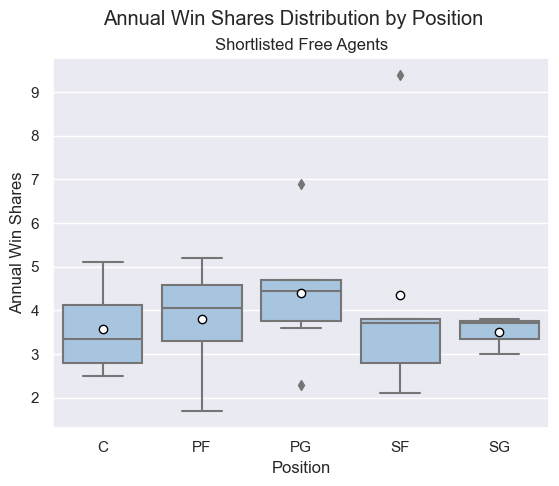

In [18]:
meanpointprops = dict(marker='o', markeredgecolor='black',
                      markerfacecolor='white')
ax = sns.boxplot(x='position1', 
                 y='win_shares', 
                 color='#9FC5E8',
                 showmeans=True,
                 order=['C', 'PF', 'PG', 'SF', 'SG'],
                 meanprops=meanpointprops,
                 data=df)

ax.ticklabel_format(style='plain', useMathText=True, scilimits=(0,0), axis='y')
ax.get_yaxis().set_major_formatter(matplot.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
ax.set_ylabel('Annual Win Shares')
ax.set_xlabel('Position')
ax.set_title("Shortlisted Free Agents")
_ = plt.suptitle("Annual Win Shares Distribution by Position")

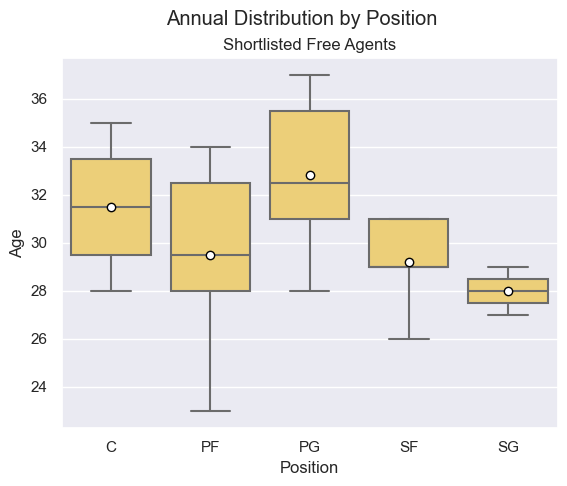

In [19]:
meanpointprops = dict(marker='o', markeredgecolor='black',
                      markerfacecolor='white')
ax = sns.boxplot(x='position1', 
                 y='age', 
                 color='#FFD966',
                 showmeans=True,
                 order=['C', 'PF', 'PG', 'SF', 'SG'],
                 meanprops=meanpointprops,
                 data=df)

ax.ticklabel_format(style='plain', useMathText=True, scilimits=(0,0), axis='y')
ax.get_yaxis().set_major_formatter(matplot.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
ax.set_ylabel('Age')
ax.set_xlabel('Position')
ax.set_title("Shortlisted Free Agents")
_ = plt.suptitle("Annual Distribution by Position")

### Positional Viz summary:

- No surprise that, given the variance in annual_salary and the low number of records in the free_agents data set, especially for each of the five levels in position1, the distributions are quite different from one position to the next.
- While there is less dispersion in the win_shares distributions, the position-by-position view appears to match the same for the variable annual_salary.
- And while we previously discovered that the variable age is normally distributed, its distribution is nevertheless quite different when otherwise viewed by position. For instance, most centers and point guards are above the age of 30, whereas most shooting forwards and shooting guards are below the age of 30.

### Correlation between win shares and annaul salary

Positive correlation between salary and win shares

In [20]:
df['annual_salary'].corr(df['win_shares'])

0.757150726617279

Plot data and a linear regression model fit.

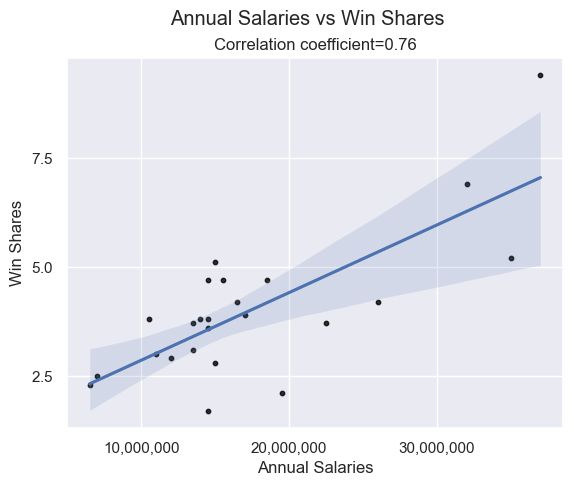

In [21]:
ax = sns.regplot(x= df.annual_salary, y=df.win_shares, scatter_kws={"color": "black", "s": 10})
ax.ticklabel_format(style='plain', useMathText=True, scilimits=(0,0), axis='y')
ax.get_xaxis().set_major_formatter(matplot.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
#configure ticks 
ax.set_xticks((10000000, 20000000, 30000000))
# ax.set_xlim((24, 38))
ax.set_yticks((2.5,5.0,7.5))
# Set label names
ax.set_xlabel('Annual Salaries')
ax.set_ylabel('Win Shares')
ax.set_title("Correlation coefficient=0.76")
_ = plt.suptitle("Annual Salaries vs Win Shares")

A regression line, or line of best fit, is an annotation meant to visualize a trend in a data series; the line is drawn so as to minimize the distances between it and the data. The shaded area is the 95% confidence interval for that regression

In [22]:
pd.options.display.float_format = '{:.2f}'.format

In [23]:
df_count = df.groupby('position1').agg(
    n=pd.NamedAgg("position1", "count")).reset_index()

In [24]:
df_means = df.groupby('position1').agg(
    meanSalary=pd.NamedAgg("annual_salary", "mean"),
    meanWinShares=pd.NamedAgg("win_shares", "mean"),
    meanAge=pd.NamedAgg("age", "mean")).reset_index()

In [25]:
joined_df = pd.concat([df_count, df_means], axis=1)

In [26]:
joined_df=joined_df.T.drop_duplicates().T

In [27]:
joined_df['ms'] = joined_df['meanSalary'].apply(lambda x: math.trunc(x*.000001))
joined_df['mws'] = joined_df['meanWinShares'].apply(lambda x: math.trunc(x))
joined_df['ma'] = joined_df['meanAge'].apply(lambda x: math.trunc(x))

In [28]:
joined_df.head()

,position1,n,meanSalary,meanWinShares,meanAge,ms,mws,ma
0,C,4,12000000.00,3.57,31.50,12,3,31
1,PF,6,20083333.33,3.80,29.50,20,3,29
2,PG,6,17250000.00,4.40,32.83,17,4,32
3,SF,5,19900000.00,4.36,29.20,19,4,29
4,SG,3,14666666.67,3.50,28.00,14,3,28


In [29]:
def add_pct_labels(ax, value, label, spacing):
    for i,p in enumerate(ax.patches):
        height = p.get_height() # get the height of each bar # adding text to each bar
        ax.text(x = p.get_x()+(p.get_width()/2), # x-coordinate position of data label, padded to be in the middle of the bar
        y = height-spacing, # y-coordinate position of data label, padded 0.2 above bar
        s = '{:.0f}'.format(value[i]), # data label, formatted to ignore decimals
        ha = 'center', # sets horizontal alignment (ha) to center
        size=8, 
        c='black',
        backgroundcolor='#fffcf2',
        label=label)
        if i < 1:
            ax.annotate(label, xy=(p.get_x()+(p.get_width()/2)+.1, height-spacing+.1), xytext=(p.get_x()+(p.get_width()/2)+.5, height-spacing),
                arrowprops=dict(facecolor='black', shrink=0.05))

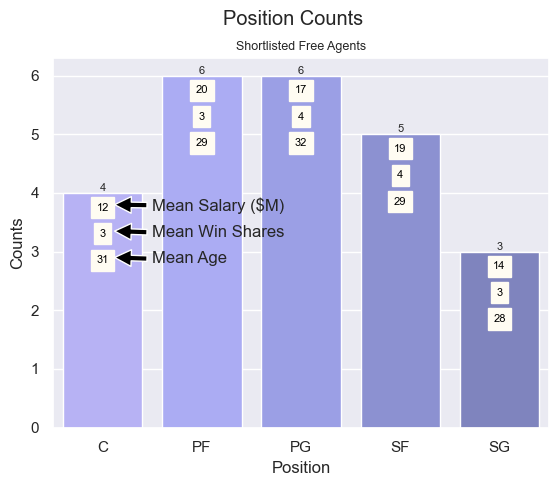

In [30]:
palettes = [ '#ada7ff', '#9fa0ff', '#8e94f2', '#8187dc', '#757bc8']
bar_order=["C", "PF", "PG","SF", "SG"]
ms = [joined_df.loc[joined_df["position1"] == i]['ms'].values[0] for i in bar_order]
mws = [joined_df.loc[joined_df["position1"] == i]['mws'].values[0] for i in bar_order]
ma = [joined_df.loc[joined_df["position1"] == i]['ma'].values[0] for i in bar_order]
ax = sns.barplot(joined_df, x='position1', y='n', palette=palettes)
# pcts = [gp_df.loc[mp_df["pk2"] == i]['pct'].values[0] for i in bar_order]
ax.set_title("Shortlisted Free Agents", size=9)
plt.suptitle("Position Counts")
ax.set_ylabel("Counts")
ax.set_xlabel("Position")
add_pct_labels(ax, ms, 'Mean Salary ($M)', .3)
add_pct_labels(ax, mws, 'Mean Win Shares', .75)
add_pct_labels(ax, ma,"Mean Age", 1.2)
_ = ax.bar_label(ax.containers[0],size=8, fmt='%.0f')

### Constrained optimization 

- The GM has room to sign five players (first constraint)
- There must be one point guard, one shooting guard, one center, one power forward, and one shooting forward (second constraint)
- Annual salaries, collectively, must not exceed $90,000,000 (third constraint)
- And the average age of these five players, at the time of signing, must be equal to or less than 30 (fourth and final constraint)

##### Construct the opitimization DF 

sort values by position 2

In [31]:
sorted_df = df.sort_values(by='position2')[['player', 'age', 'position2', 'annual_salary', 'win_shares']]

In [32]:
sorted_df.head()

,player,age,position2,annual_salary,win_shares
10,Jonas Valanciunas,30,C1,15000000,5.10
19,Jusuf Nurkic,28,C2,14000000,3.80
22,Serge Ibaka,33,C3,12000000,2.90
23,Aron Baynes,35,C4,7000000,2.50
2,Blake Griffin,33,PF1,35000000,5.20


##### binary encode (T/F) position 2

In [33]:
sorted_df['centers'] = sorted_df.position2.apply(lambda x: 1 if x.startswith('C') else 0)
sorted_df['power_forwards'] = sorted_df.position2.apply(lambda x: 1 if x.startswith('PF') else 0)
sorted_df['point_guards'] = sorted_df.position2.apply(lambda x: 1 if x.startswith('PG') else 0)
sorted_df['shooting_forwards'] = sorted_df.position2.apply(lambda x: 1 if x.startswith('SF') else 0)
sorted_df['shooting_guards'] = sorted_df.position2.apply(lambda x: 1 if x.startswith('SG') else 0)

In [34]:
sorted_df.head()

,player,age,position2,annual_salary,win_shares,centers,power_forwards,point_guards,shooting_forwards,shooting_guards
10,Jonas Valanciunas,30,C1,15000000,5.10,1,0,0,0,0
19,Jusuf Nurkic,28,C2,14000000,3.80,1,0,0,0,0
22,Serge Ibaka,33,C3,12000000,2.90,1,0,0,0,0
23,Aron Baynes,35,C4,7000000,2.50,1,0,0,0,0
2,Blake Griffin,33,PF1,35000000,5.20,0,1,0,0,0


In [35]:
sorted_df['t'] = 1

In [36]:
constraint_matrix = pd.DataFrame(sorted_df[['centers', 'centers', 
           'power_forwards', 'power_forwards', 
           'point_guards', 'point_guards', 
           'shooting_forwards', 'shooting_forwards',
           'shooting_guards', 'shooting_guards',
           't',
           'annual_salary',
           'age'
            ]].to_numpy(), 
            columns=["OneCenterMax",
                     "OneCenterMin",
                     "OnePowerForwardMax",
                     "OnePowerForwardMin",
                     "OnePointGuardMax",
                     "OnePointGuardMin",
                     "OneShootingForwardMax",
                     "OneShootingForwardMin",
                     "OneShootingGuardMax",
                     "OneShootingGuardMin",
                     "FivePlayerMax",
                     "SalaryMax",
                     "AgeMax"]
                    ).set_index(sorted_df['position2'])

In [37]:
constraint_matrix=constraint_matrix.transpose()

In [38]:
constraint_matrix

position2,C1,C2,C3,C4,PF1,PF2,PF3,PF4,PF5,PF6,PG1,PG2,PG3,PG4,PG5,PG6,SF1,SF2,SF3,SF4,SF5,SG1,SG2,SG3
OneCenterMax,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
OneCenterMin,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
OnePowerForwardMax,0,0,0,0,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
OnePowerForwardMin,0,0,0,0,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
OnePointGuardMax,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,0,0,0,0,0,0,0,0
OnePointGuardMin,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,0,0,0,0,0,0,0,0
OneShootingForwardMax,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,0,0,0
OneShootingForwardMin,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,0,0,0
OneShootingGuardMax,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1
OneShootingGuardMin,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1


Constraints set in const_rhs below
- no more than 1 
    - center
    - Power Forward 
    - Point guard
    - Shooting forward
    - shooting guard
- Max players 


In [66]:
cm = constraint_matrix.to_numpy()
objective = sorted_df['win_shares'].to_numpy()
const_rhs = [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 5, 90000000, 150]
bounds = [(0, 1)] * cm.shape[1]
int_vars = [1 for i in range(1, 25)]

Call scipy lingprog function
- pass in -objective to maximize 
- use integrality to make decision variable be an integer within bounds e.g., 0 or 1

In [93]:
result = opt.linprog(c=-objective, A_ub=cm, b_ub=const_rhs, bounds=bounds, integrality=int_vars)

In [94]:
opt_solution_col = [True if i > 0 else False for i in result['x']]

In [95]:
sorted_df['opt'] = opt_solution_col

In [97]:
opt_df = sorted_df.loc[sorted_df.opt == True]

Any other combination of players would either result in a lower win share total or would violate at least one of the defined hard constraints

In [101]:
opt_df

,player,age,position2,annual_salary,win_shares,centers,power_forwards,point_guards,shooting_forwards,shooting_guards,t,opt
22,Serge Ibaka,33,C3,12000000,2.90,1,0,0,0,0,1,True
16,Marvin Bagley III,23,PF4,14500000,4.70,0,1,0,0,0,1,True
15,Marcus Smart,28,PG5,15500000,4.70,0,0,1,0,0,1,True
1,Kawhi Leonard,31,SF1,37000000,9.40,0,0,0,1,0,1,True
6,Zach LaVine,27,SG3,10500000,3.80,0,0,0,0,1,1,True


Annual salary within bounds of $90M

In [98]:
opt_df.annual_salary.sum()

89500000

Expected win shares for the optimial free agent selection

In [99]:
opt_df.win_shares.sum()

25.500000000000004

Age within the bounds to not exceed 150 

In [102]:
opt_df.age.mean(), opt_df.age.sum()

(28.4, 142)